In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.shape

(400, 5)

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:

df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})

In [ ]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


checking for outliers in age and estimatedsalary columns

In [ ]:
q3= df.Age.quantile(0.75)
q1= df.Age.quantile(0.25)
iqr = q3-q1
lower_threshold = q1-1.5*iqr
upper_threshold = q3+1.5*iqr

In [ ]:
print("upper_threshold--",upper_threshold)
print("lower_threshold--",lower_threshold)
print("max--",df.Age.max())
print("min--",df.Age.min())


upper_threshold-- 70.375
lower_threshold-- 5.375
max-- 60
min-- 18


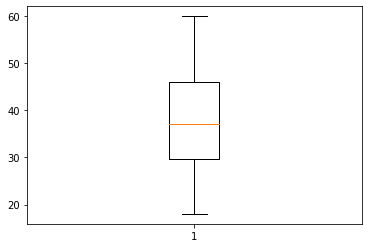

In [ ]:
plt.boxplot(df.Age)
plt.show()

In [ ]:
#no ouliers in age
#lets check for estimated salary

In [ ]:
q3= df.EstimatedSalary.quantile(0.75)
q1= df.EstimatedSalary.quantile(0.25)
iqr = q3-q1
lower_threshold = q1-1.5*iqr
upper_threshold = q3+1.5*iqr
print("upper_threshold--",upper_threshold)
print("lower_threshold--",lower_threshold)
print("max--",df.EstimatedSalary.max())
print("min--",df.EstimatedSalary.min())

upper_threshold-- 155500.0
lower_threshold-- -24500.0
max-- 150000
min-- 15000


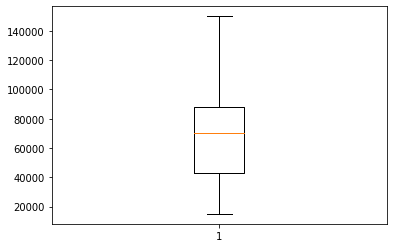

In [ ]:
plt.boxplot(df.EstimatedSalary)
plt.show()

In [ ]:
#no outliers detected in dtaset

In [ ]:
count = df.Purchased.value_counts()
count.plot(kind='bar', title="count of target variable")

NameError: ignored

In [ ]:
#dropping user id
df.drop(["User ID"],axis=1,inplace = True)

**Splitting the dataset into the Training set and Test set**

In [ ]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
X= df[["Gender","Age","EstimatedSalary"]].values
y=df['Purchased'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

**Fitting K-NN to the Training set**

In [ ]:
for i in range (1,20):
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model
                           

K value  :  1  train score :  0.996875  cv score :  0.796875
K value  :  2  train score :  0.896875  cv score :  0.76875
K value  :  3  train score :  0.896875  cv score :  0.753125
K value  :  4  train score :  0.85625  cv score :  0.784375
K value  :  5  train score :  0.85625  cv score :  0.765625
K value  :  6  train score :  0.84375  cv score :  0.796875
K value  :  7  train score :  0.84375  cv score :  0.796875
K value  :  8  train score :  0.859375  cv score :  0.778125
K value  :  9  train score :  0.85625  cv score :  0.796875
K value  :  10  train score :  0.834375  cv score :  0.7875
K value  :  11  train score :  0.8375  cv score :  0.80625
K value  :  12  train score :  0.825  cv score :  0.803125
K value  :  13  train score :  0.834375  cv score :  0.790625
K value  :  14  train score :  0.840625  cv score :  0.803125
K value  :  15  train score :  0.8375  cv score :  0.8
K value  :  16  train score :  0.81875  cv score :  0.8
K value  :  17  train score :  0.840625  cv 

In [ ]:
#k value 18 is best

In [ ]:
 knn = KNeighborsClassifier(18) #initialising the model
 knn.fit(X_train,y_train) # training the model

KNeighborsClassifier(n_neighbors=18)

**Predicting the Test set results**

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preds

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
75,0,0
76,0,0
77,0,0
78,0,0


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[51,  6],
       [ 6, 17]])

f1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7391304347826085

auroc score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8169336384439359